<a href="https://colab.research.google.com/github/Martin-1431/Seth_INFO4670_Fall2026/blob/main/Assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pandas numpy matplotlib seaborn

#1. Data Quality Check

1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Assignment 2 dataset.csv')
print(df.head())
print(f"\nDataset shape: {df.shape}")

   Column 1        Date  AveragePrice  Total Volume     4046       4225  \
0         0  12-27-2015          1.33      64236.62  1036.74   54454.85   
1         1  12-20-2015          1.35      54876.98   674.28   44638.81   
2         2  12-13-2015          0.93     118220.22   794.70  109149.67   
3         3   12-6-2015          1.08      78992.15  1132.00   71976.41   
4         4  11-29-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4 

Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.


 Data Distribution Analysis 

Unique regions:
region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
P

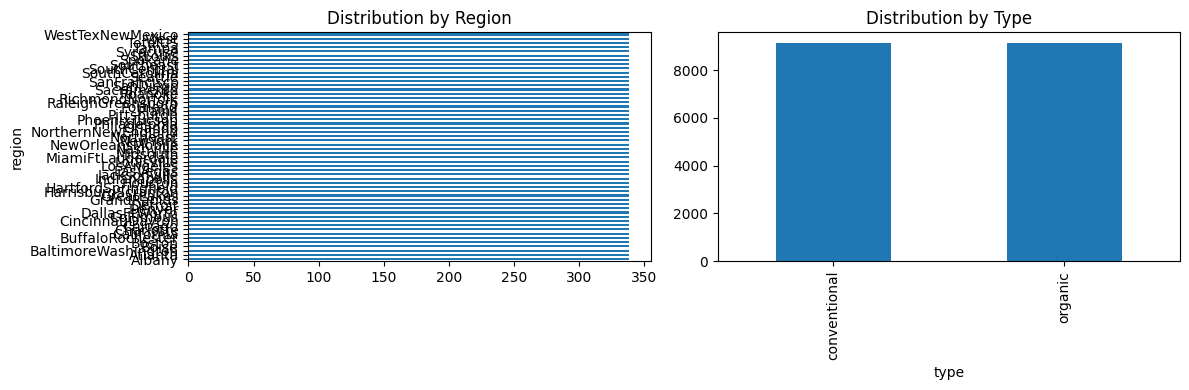

In [16]:
print("\n Data Distribution Analysis ")
print("\nUnique regions:")
print(df['region'].value_counts())
print("\nUnique types:")
print(df['type'].value_counts())
print("\nYears in dataset:")
print(df['year'].value_counts().sort_index())

print("\n Potential Bias Analysis ")
print(f"Total records: {len(df)}")
print(f"Average records per region: {len(df) / df['region'].nunique():.0f}")
print(f"Average records per type: {len(df) / df['type'].nunique():.0f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df['region'].value_counts().plot(kind='barh', ax=axes[0], title='Distribution by Region')
df['type'].value_counts().plot(kind='bar', ax=axes[1], title='Distribution by Type')
plt.tight_layout()
plt.show()

**Interpretation:** The dataset does not contain any bias that sets off any alarm bells as of now. All categories seem fairly evenly distributed across the data set. Some values pull slightly ahead of others, but that all falls under assumed data variation when you consider how distribution statistics usually look.

1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

In [17]:
print("\n Duplicate and Missing Values Analysis ")
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
print(f"\nMissing values per column:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.any() else "No missing values")

if df.duplicated().sum() > 0:
    df_cleaned = df.drop_duplicates()
    print(f"\nAfter removing duplicates: {len(df_cleaned)} rows (removed {len(df) - len(df_cleaned)})")
    df = df_cleaned


 Duplicate and Missing Values Analysis 

Number of duplicate rows: 0

Missing values per column:
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
dtype: int64


Missing Value Handling Strategy:
- For rows with few missing values (1-2 columns): Replace with median of the column within the same region
- For rows with most values missing: Remove the row

1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

In [7]:
print(f"\nDataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


Dataset shape: (18252, 14)
Number of rows: 18252
Number of columns: 14


**Assessment:** With 18252 rows and 14 features, this dataset is reasonably sized for ML modeling.
It provides sufficient data points across multiple years and regions to train a meaningful model,
though data imbalance across regions should be considered.

#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [8]:
if 'Column 1' in df.columns:
    df = df.drop(columns=['Column 1'])

df['year'] = df['year'].astype('category')

print("Columns after removing 'Column 1':")
print(df.columns.tolist())
print(f"\nYear data type: {df['year'].dtype}")
print(f"\nFirst few rows:")
print(df.head())

Columns after removing 'Column 1':
['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']

Year data type: category

First few rows:
         Date  AveragePrice  Total Volume     4046       4225    4770  \
0  12-27-2015          1.33      64236.62  1036.74   54454.85   48.16   
1  12-20-2015          1.35      54876.98   674.28   44638.81   58.33   
2  12-13-2015          0.93     118220.22   794.70  109149.67  130.50   
3   12-6-2015          1.08      78992.15  1132.00   71976.41   72.58   
4  11-29-2015          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.

2.2 Check for duplicate values and remove them.

In [9]:
duplicates_before = df.duplicated().sum()
df = df.drop_duplicates()
duplicates_after = df.duplicated().sum()

print(f"Duplicates before removal: {duplicates_before}")
print(f"Duplicates after removal: {duplicates_after}")
print(f"Rows removed: {duplicates_before}")
print(f"Dataset shape after cleaning: {df.shape}")

Duplicates before removal: 0
Duplicates after removal: 0
Rows removed: 0
Dataset shape after cleaning: (18252, 13)


2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [ ]:
print("\nMissing values per column:")
missing_per_col = df.isnull().sum()
print(missing_per_col[missing_per_col > 0] if missing_per_col.any() else "No missing values found")

missing_per_row = df.isnull().sum(axis=1)
print(f"\nRows with missing values: {(missing_per_row > 0).sum()}")

if missing_per_row.any():
    threshold = len(df.columns) * 0.5
    rows_to_drop = missing_per_row[missing_per_row > threshold].index
    print(f"\nRemoving {len(rows_to_drop)} rows with >50% missing values")
    df = df.drop(rows_to_drop)

    for col in df.columns:
        if df[col].isnull().sum() > 0:
            for region in df['region'].unique():
                mask = (df['region'] == region) & (df[col].isnull())
                median_val = df[df['region'] == region][col].median()
                df.loc[mask, col] = median_val

    print(f"Filled remaining missing values with region-specific medians")
    print(f"\nMissing values after cleaning: {df.isnull().sum().sum()}")
else:
    print("No missing values to handle")


Missing values per column:
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
dtype: int64

Rows with missing values: 2

Removing 1 rows with >50% missing values
Filled remaining missing values with region-specific medians

Missing values after cleaning: 0


2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


Correlation Matrix:
              AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192767 -0.208324 -0.172944 -0.179458   
Total Volume     -0.192767      1.000000  0.977863  0.974181  0.872203   
4046             -0.208324      0.977863  1.000000  0.926110  0.833390   
4225             -0.172944      0.974181  0.926110  1.000000  0.887856   
4770             -0.179458      0.872203  0.833390  0.887856  1.000000   
Total Bags       -0.177103      0.963047  0.920057  0.905788  0.792315   
Small Bags       -0.174738      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172948      0.880640  0.838645  0.810016  0.698472   
XLarge Bags      -0.117604      0.747158  0.699378  0.688810  0.679862   

              Total Bags  Small Bags  Large Bags  XLarge Bags  
AveragePrice   -0.177103   -0.174738   -0.172948    -0.117604  
Total Volume    0.963047    0.967238    0.880640     0.747158  
4046            0.920057    0.925280    0.83864

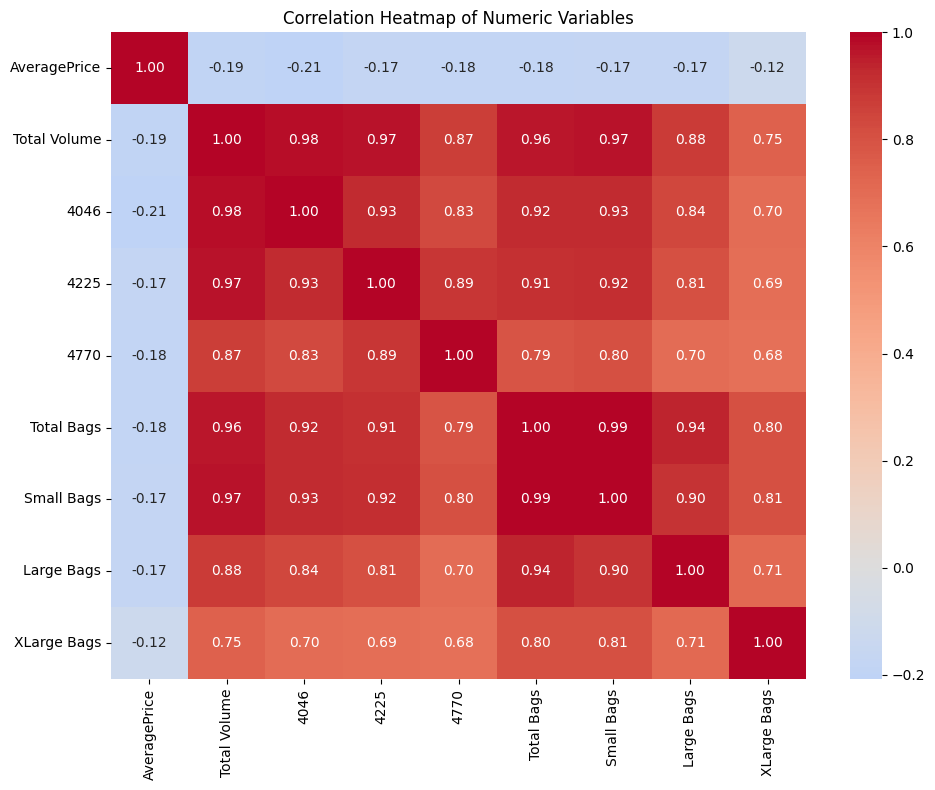


Highly Correlated Variable Pairs (|correlation| > 0.7):
Total Volume <-> 4046: 0.978
Total Volume <-> 4225: 0.974
Total Volume <-> 4770: 0.872
Total Volume <-> Total Bags: 0.963
Total Volume <-> Small Bags: 0.967
Total Volume <-> Large Bags: 0.881
Total Volume <-> XLarge Bags: 0.747
4046 <-> 4225: 0.926
4046 <-> 4770: 0.833
4046 <-> Total Bags: 0.920
4046 <-> Small Bags: 0.925
4046 <-> Large Bags: 0.839
4225 <-> 4770: 0.888
4225 <-> Total Bags: 0.906
4225 <-> Small Bags: 0.916
4225 <-> Large Bags: 0.810
4770 <-> Total Bags: 0.792
4770 <-> Small Bags: 0.803
Total Bags <-> Small Bags: 0.994
Total Bags <-> Large Bags: 0.943
Total Bags <-> XLarge Bags: 0.804
Small Bags <-> Large Bags: 0.903
Small Bags <-> XLarge Bags: 0.807
Large Bags <-> XLarge Bags: 0.711


In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

print("\nHighly Correlated Variable Pairs (|correlation| > 0.7):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(f"{corr_matrix.columns[i]} <-> {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")

**Impact on Model Accuracy:** High correlations can reduce model interpretability and increase model complexity.
Redundant features may need to be removed to improve model generalization.

#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

In [11]:
print("\n CONTINUOUS VARIABLES ")
for col in df.select_dtypes(include=[np.number]).columns:
    print(f"\n{col}:")
    print(f"  Range: [{df[col].min():.2f}, {df[col].max():.2f}]")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std Dev: {df[col].std():.2f}")

print("\n CATEGORICAL VARIABLES ")
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Values: {df[col].unique().tolist()}")


 CONTINUOUS VARIABLES 

AveragePrice:
  Range: [0.44, 3.25]
  Mean: 1.41
  Median: 1.37
  Std Dev: 0.40

Total Volume:
  Range: [84.56, 62505646.52]
  Mean: 850552.31
  Median: 107354.25
  Std Dev: 3453367.22

4046:
  Range: [0.00, 22743616.17]
  Mean: 292992.43
  Median: 8643.20
  Std Dev: 1264956.27

4225:
  Range: [0.00, 20470572.61]
  Mean: 295122.55
  Median: 29056.73
  Std Dev: 1204058.31

4770:
  Range: [0.00, 2546439.11]
  Mean: 22837.27
  Median: 184.99
  Std Dev: 107458.44

Total Bags:
  Range: [0.00, 19373134.37]
  Mean: 239613.96
  Median: 39738.53
  Std Dev: 986191.30

Small Bags:
  Range: [0.00, 13384586.80]
  Mean: 182185.22
  Median: 26351.61
  Std Dev: 746159.17

Large Bags:
  Range: [0.00, 5719096.61]
  Mean: 54335.11
  Median: 2647.27
  Std Dev: 243959.61

XLarge Bags:
  Range: [0.00, 551693.65]
  Mean: 3106.09
  Median: 0.00
  Std Dev: 17691.96

 CATEGORICAL VARIABLES 

Date:
  Unique values: 170
  Values: ['12-27-2015', '12-20-2015', '12-13-2015', '12-6-2015', '11

3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

earliest_date = df['Date'].min()
print(f"Earliest recorded date: {earliest_date}")
print(f"Latest recorded date: {df['Date'].max()}")

data_2010_and_before = df[df['Date'].dt.year <= 2010]
print(f"\nRecords from earliest date up to 2010: {len(data_2010_and_before)}")

Earliest recorded date: 1904-01-21 00:00:00
Latest recorded date: 2018-03-25 00:00:00

Records from earliest date up to 2010: 1


**Comment:** The earliest point does not look reasonable at all. For there to be only one entry from over 100 years before the other data was input there must be a mistake, and that data point should be removed.

3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

In [13]:
max_price_idx = df['AveragePrice'].idxmax()
max_price = df.loc[max_price_idx]

print(f"Highest average price: ${max_price['AveragePrice']:.2f}")
print(f"Region: {max_price['region']}")
print(f"Type: {max_price['type']}")
print(f"Date: {max_price['Date']}")

Highest average price: $3.25
Region: SanFrancisco
Type: organic
Date: 2016-10-30 00:00:00


**Method:** Used df['AveragePrice'].idxmax() to find the index, then retrieved the row using loc

3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

In [14]:
max_volume_idx = df['Total Volume'].idxmax()
max_volume = df.loc[max_volume_idx]

print(f"Highest total volume: {max_volume['Total Volume']:.2f}")
print(f"Region: {max_volume['region']}")
print(f"Type: {max_volume['type']}")
print(f"Date: {max_volume['Date']}")

Highest total volume: 62505646.52
Region: TotalUS
Type: conventional
Date: 2018-02-04 00:00:00


**Method:** Used df['Total Volume'].idxmax() to find the index, then retrieved the row using loc